<Axes: ylabel='Avg'>

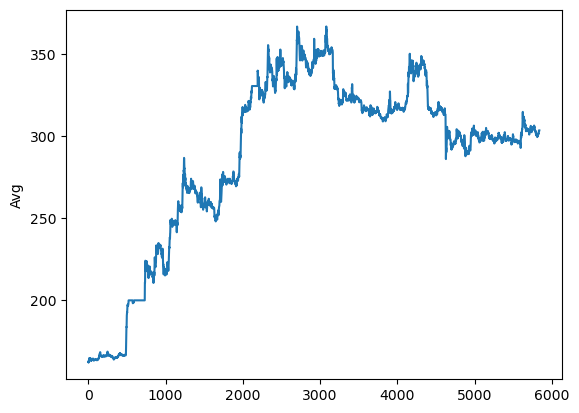

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import talib

df = pd.read_csv('123181_train_raw.csv')
df['Avg'] = talib.AVGPRICE(df['Open'], df['High'], df['Low'], df['Close'])

sns.lineplot(x=df.index, y=df['Avg'])


In [5]:
def target(df, column, period):
    if period == 1:
        return (df[column].shift(-1) - df[column])/df[column]
    if period > 1:
        return (df[column].rolling(window=period).mean().shift(-1 * period) - df[column]) / df[column]

<Axes: >

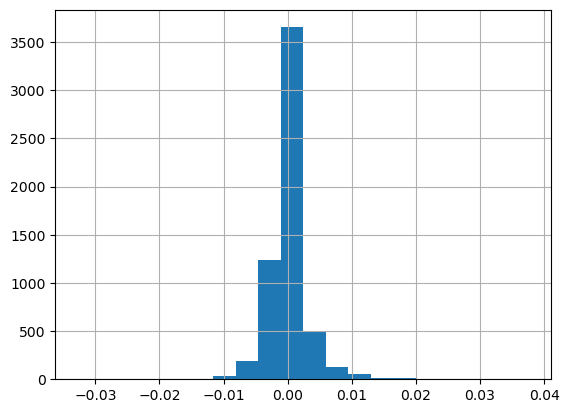

In [9]:
df['return'] = target(df,'Close', 1)
df['return2'] = target(df,'Avg', 1)

# sns.lineplot(x=df.index, y=df['return'])

# df['return'].hist(bins=20)
df['return2'].hist(bins=20)